In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [2]:
df=pd.read_csv('Data.csv', encoding="utf-8")
df.head()

,price,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
0,2.000900e+09,ولنجک,270,1399,2.000000e+09,30000000.0,1,1,1
1,2.001200e+08,کوی فردوس,70,1387,2.000000e+08,4000000.0,0,1,1
2,3.502550e+08,پونک,120,1395,3.500000e+08,8500000.0,1,1,1
3,2.003000e+08,هروی,110,1395,2.000000e+08,10000000.0,1,1,1
4,2.001800e+08,پونک,80,1387,2.000000e+08,6000000.0,1,1,1


In [3]:
df.describe()

,price,area,year,deposit,rent,elavator,parking,warehouse
count,1.238300e+04,12383.000000,12383.000000,1.238300e+04,1.238300e+04,12383.000000,12383.000000,12383.000000
mean,4.958421e+08,171.521198,1391.682468,4.952882e+08,1.846474e+07,0.806347,0.884923,0.999838
std,8.858276e+08,2979.645853,6.686362,8.856925e+08,4.773774e+08,0.395176,0.319128,0.012708
min,0.000000e+00,5.000000,1363.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.001800e+08,80.000000,1387.000000,1.000000e+08,0.000000e+00,1.000000,1.000000,1.000000
50%,3.000000e+08,115.000000,1393.000000,3.000000e+08,1.500000e+06,1.000000,1.000000,1.000000
75%,5.509000e+08,155.000000,1397.000000,5.500000e+08,8.000000e+06,1.000000,1.000000,1.000000
max,5.000014e+10,300000.000000,1399.000000,5.000000e+10,3.500000e+10,1.000000,1.000000,1.000000


# visualize

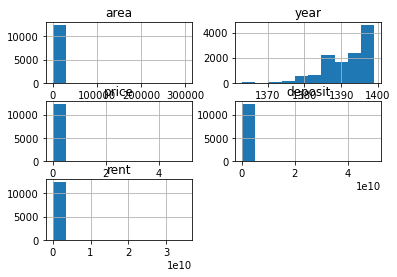

In [4]:
cdf=df[['neighborhood','area','year','price','deposit','rent']]
cdf.hist();

# cleaning

In [5]:
cdf=cdf[cdf['price']>0]

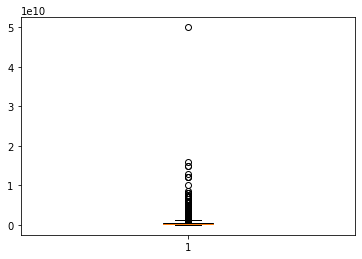

In [6]:
plt.boxplot(cdf['price'],patch_artist=True);

In [7]:
q1=cdf['price'].quantile(0.25)
q3=cdf['price'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5+iqr
cdf=cdf[cdf['price']<=upper]

print(" Before cleaning : ",len(df))
print(" After cleaning : ",len(cdf))

 Before cleaning :  12383
 After cleaning :  9556


In [8]:
q1=cdf['area'].quantile(0.25)
q3=cdf['area'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5+iqr
cdf=cdf[cdf['area']<=upper]

print(" After cleaning : ",len(cdf))

 After cleaning :  8919


In [9]:
q1=cdf['deposit'].quantile(0.25)
q3=cdf['deposit'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5+iqr
cdf=cdf[cdf['deposit']<=upper]

print(" After cleaning : ",len(cdf))

 After cleaning :  8546


In [10]:
q1=cdf['rent'].quantile(0.25)
q3=cdf['rent'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5+iqr
cdf=cdf[cdf['rent']<=upper]

print(" After cleaning : ",len(cdf))

 After cleaning :  7852


# visualize

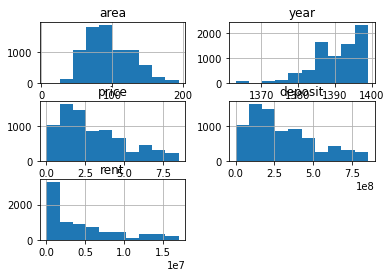

In [11]:

cdf.hist();

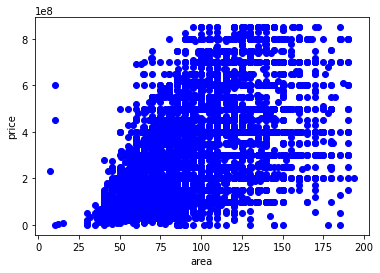

In [12]:
plt.scatter(cdf.area, cdf.price,  color='blue')
plt.xlabel("area")
plt.ylabel("price")
plt.show()

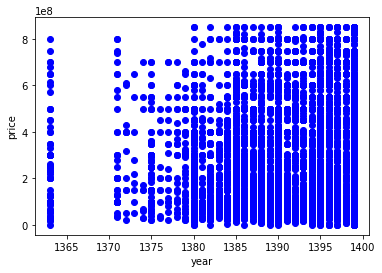

In [13]:
plt.scatter(cdf.year, cdf.price,  color='blue')
plt.xlabel("year")
plt.ylabel("price")
plt.show()

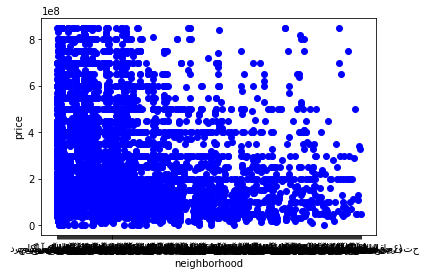

In [14]:
plt.scatter(cdf.neighborhood,cdf.price,color='blue')
plt.xlabel("neighborhood")
plt.ylabel("price")
plt.show()

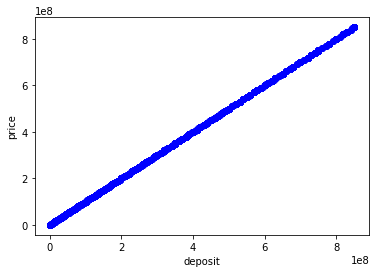

In [15]:
plt.scatter(cdf.deposit,cdf.price,color='blue')
plt.xlabel("deposit")
plt.ylabel("price")
plt.show()

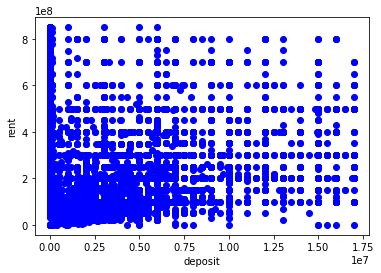

In [16]:
plt.scatter(cdf.rent,cdf.price,color='blue')
plt.xlabel("deposit")
plt.ylabel("rent")
plt.show()

### Handeling string features (neighborhood is string)
Linear regression requires numerical input

In [17]:
cdf['neighborhood'].nunique()

306

In [18]:
#cdf['neighborhood']=cdf['neighborhood'].astype('category')
#cdf.info()


# train the model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# this method cause data leakage
#x=cdf[['area','year','deposit','rent','neighborhood_encoded']]

x=cdf[['area','year','neighborhood']]
y=cdf['price']

#split first
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [20]:
# this method cause data leakage

# mean_price_by_neighborhood=cdf.groupby('neighborhood')['price'].mean()
# cdf['neighborhood_encoded']=cdf['neighborhood'].map(mean_price_by_neighborhood)

In [21]:
#calculate mean only on training data
x_train=x_train.copy()
x_test=x_test.copy()

train_data=x_train.copy()
train_data['price']=y_train

neighborhood_mean=train_data.groupby('neighborhood')['price'].mean()

#map and fill missing with golobal mean 

global_mean=y_train.mean()

x_train['neighborhood_encoded']=x_train['neighborhood'].map(neighborhood_mean)
x_test['neighborhood_encoded']=x_test['neighborhood'].map(neighborhood_mean)

#fill missing value
x_test['neighborhood_encoded']=x_test['neighborhood_encoded'].fillna(global_mean)

#Delete a string column
x_train= x_train[['area','year','neighborhood_encoded']]
x_test= x_test[['area','year','neighborhood_encoded']]

model = LinearRegression()
model.fit (x_train, y_train)

# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)



Coefficients:  [2.42643000e+06 5.35764591e+06 7.02636559e-01]
Intercept:  -7594725469.41532


In [22]:
y_pred=model.predict(x_test)

y_pred


array([4.45287959e+08, 3.37858511e+08, 9.57782431e+07, ...,
       5.12061724e+08, 3.99929107e+08, 4.12680372e+08])

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )

MAE: 131383185.54018775
MSE: 2.6713787334662696e+16
R2-score: 0.41
